## TELECOM CUSTOMER CHURN CASE STUDY 

In [525]:
# Importing libraries 
import numpy as np
import pandas as pd
from sklearn import metrics
from sklearn.model_selection import KFold
import warnings
warnings.filterwarnings('ignore')

In [526]:
#Loading dataset
inputfile = pd.read_csv("telecom_churn_data.csv")

In [527]:
inputfile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


In [528]:
inputfile.head()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0     7000842753        109             0.0             0.0             0.0   
1     7001865778        109             0.0             0.0             0.0   
2     7001625959        109             0.0             0.0             0.0   
3     7001204172        109             0.0             0.0             0.0   
4     7000142493        109             0.0             0.0             0.0   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
0            6/30/2014            7/31/2014            8/31/2014   
1            6/30/2014            7/31/2014            8/31/2014   
2            6/30/2014            7/31/2014            8/31/2014   
3            6/30/2014            7/31/2014            8/31/2014   
4            6/30/2014            7/31/2014            8/31/2014   

  last_date_of_month_9   arpu_6     ...      sachet_3g_9  fb_user_6  \
0            9/30/2014  197.385     ...                0        1.0   
1            9/30/2014   34.047     ...                0        NaN   
2            9/30/2014  167.690     ...                0        NaN   
3            9/30/2014  221.338     ...                0        NaN   
4            9/30/2014  261.636     ...                0        0.0   

   fb_user_7  fb_user_8  fb_user_9   aon  aug_vbc_3g  jul_vbc_3g  jun_vbc_3g  \
0        1.0        1.0        NaN   968        30.4         0.0      101.20   
1        1.0        1.0        NaN  1006         0.0         0.0        0.00   
2        NaN        NaN        1.0  1103         0.0         0.0        4.17   
3        NaN        NaN        NaN  2491         0.0         0.0        0.00   
4        NaN        NaN        NaN  1526         0.0         0.0        0.00   

   sep_vbc_3g  
0        3.58  
1        0.00  
2        0.00  
3        0.00  
4        0.00  

[5 rows x 226 columns]

In [529]:
inputfile.select_dtypes("object").info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 12 columns):
last_date_of_month_6        99999 non-null object
last_date_of_month_7        99398 non-null object
last_date_of_month_8        98899 non-null object
last_date_of_month_9        98340 non-null object
date_of_last_rech_6         98392 non-null object
date_of_last_rech_7         98232 non-null object
date_of_last_rech_8         96377 non-null object
date_of_last_rech_9         95239 non-null object
date_of_last_rech_data_6    25153 non-null object
date_of_last_rech_data_7    25571 non-null object
date_of_last_rech_data_8    26339 non-null object
date_of_last_rech_data_9    25922 non-null object
dtypes: object(12)
memory usage: 9.2+ MB


In [530]:
inputfile.select_dtypes("int64").info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 35 columns):
mobile_number         99999 non-null int64
circle_id             99999 non-null int64
total_rech_num_6      99999 non-null int64
total_rech_num_7      99999 non-null int64
total_rech_num_8      99999 non-null int64
total_rech_num_9      99999 non-null int64
total_rech_amt_6      99999 non-null int64
total_rech_amt_7      99999 non-null int64
total_rech_amt_8      99999 non-null int64
total_rech_amt_9      99999 non-null int64
max_rech_amt_6        99999 non-null int64
max_rech_amt_7        99999 non-null int64
max_rech_amt_8        99999 non-null int64
max_rech_amt_9        99999 non-null int64
last_day_rch_amt_6    99999 non-null int64
last_day_rch_amt_7    99999 non-null int64
last_day_rch_amt_8    99999 non-null int64
last_day_rch_amt_9    99999 non-null int64
monthly_2g_6          99999 non-null int64
monthly_2g_7          99999 non-null int64
monthly_2g_8          99999 non

#### most of the columns have repetion for 4 months,to understand the data lets only columns for 6 month

In [531]:
## below are the feilds which are given for each month
input6 = inputfile.filter(regex='6$')
input6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 54 columns):
last_date_of_month_6        99999 non-null object
arpu_6                      99999 non-null float64
onnet_mou_6                 96062 non-null float64
offnet_mou_6                96062 non-null float64
roam_ic_mou_6               96062 non-null float64
roam_og_mou_6               96062 non-null float64
loc_og_t2t_mou_6            96062 non-null float64
loc_og_t2m_mou_6            96062 non-null float64
loc_og_t2f_mou_6            96062 non-null float64
loc_og_t2c_mou_6            96062 non-null float64
loc_og_mou_6                96062 non-null float64
std_og_t2t_mou_6            96062 non-null float64
std_og_t2m_mou_6            96062 non-null float64
std_og_t2f_mou_6            96062 non-null float64
std_og_t2c_mou_6            96062 non-null float64
std_og_mou_6                96062 non-null float64
isd_og_mou_6                96062 non-null float64
spl_og_mou_6             

In [532]:
### lets understand important columns
impcol = ['total_rech_num_6','total_rech_amt_6','max_rech_amt_6','date_of_last_rech_6','last_day_rch_amt_6',
       'date_of_last_rech_data_6','total_rech_data_6','max_rech_data_6']
input6[impcol].head()


total_rech_num_6  total_rech_amt_6  max_rech_amt_6 date_of_last_rech_6  \
0                 4               362             252           6/21/2014   
1                 4                74              44           6/29/2014   
2                 5               168              86           6/17/2014   
3                10               230              60           6/28/2014   
4                 5               196              56           6/26/2014   

   last_day_rch_amt_6 date_of_last_rech_data_6  total_rech_data_6  \
0                 252                6/21/2014                1.0   
1                  44                      NaN                NaN   
2                   0                      NaN                NaN   
3                  30                      NaN                NaN   
4                  50                 6/4/2014                1.0   

   max_rech_data_6  
0            252.0  
1              NaN  
2              NaN  
3              NaN  
4             56.0

In [533]:
### lets understand the data for few users whose has most of the data available
input6.isna().any()

last_date_of_month_6        False
arpu_6                      False
onnet_mou_6                  True
offnet_mou_6                 True
roam_ic_mou_6                True
roam_og_mou_6                True
loc_og_t2t_mou_6             True
loc_og_t2m_mou_6             True
loc_og_t2f_mou_6             True
loc_og_t2c_mou_6             True
loc_og_mou_6                 True
std_og_t2t_mou_6             True
std_og_t2m_mou_6             True
std_og_t2f_mou_6             True
std_og_t2c_mou_6             True
std_og_mou_6                 True
isd_og_mou_6                 True
spl_og_mou_6                 True
og_others_6                  True
total_og_mou_6              False
loc_ic_t2t_mou_6             True
loc_ic_t2m_mou_6             True
loc_ic_t2f_mou_6             True
loc_ic_mou_6                 True
std_ic_t2t_mou_6             True
std_ic_t2m_mou_6             True
std_ic_t2f_mou_6             True
std_ic_t2o_mou_6             True
std_ic_mou_6                 True
total_ic_mou_6

In [534]:
## Prediction has to happen on last month data sep so the columns with 9 can enter the separate df called TEST
test = inputfile.filter(regex='9$')

### Datacleaning

In [535]:
## check for object columns which can be imputed 
inputfile.select_dtypes(include='object').columns

Index(['last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8',
       'last_date_of_month_9', 'date_of_last_rech_6', 'date_of_last_rech_7',
       'date_of_last_rech_8', 'date_of_last_rech_9',
       'date_of_last_rech_data_6', 'date_of_last_rech_data_7',
       'date_of_last_rech_data_8', 'date_of_last_rech_data_9'],
      dtype='object')

In [536]:
### all are date feilds which cannot be imputed as they are different for each customer
inputfile.select_dtypes(include='object').isnull().sum()

last_date_of_month_6            0
last_date_of_month_7          601
last_date_of_month_8         1100
last_date_of_month_9         1659
date_of_last_rech_6          1607
date_of_last_rech_7          1767
date_of_last_rech_8          3622
date_of_last_rech_9          4760
date_of_last_rech_data_6    74846
date_of_last_rech_data_7    74428
date_of_last_rech_data_8    73660
date_of_last_rech_data_9    74077
dtype: int64

In [537]:
## there is no data for almost all dates in the churn phase

In [538]:
inputfile.select_dtypes(include='int64').isna().sum()

mobile_number         0
circle_id             0
total_rech_num_6      0
total_rech_num_7      0
total_rech_num_8      0
total_rech_num_9      0
total_rech_amt_6      0
total_rech_amt_7      0
total_rech_amt_8      0
total_rech_amt_9      0
max_rech_amt_6        0
max_rech_amt_7        0
max_rech_amt_8        0
max_rech_amt_9        0
last_day_rch_amt_6    0
last_day_rch_amt_7    0
last_day_rch_amt_8    0
last_day_rch_amt_9    0
monthly_2g_6          0
monthly_2g_7          0
monthly_2g_8          0
monthly_2g_9          0
sachet_2g_6           0
sachet_2g_7           0
sachet_2g_8           0
sachet_2g_9           0
monthly_3g_6          0
monthly_3g_7          0
monthly_3g_8          0
monthly_3g_9          0
sachet_3g_6           0
sachet_3g_7           0
sachet_3g_8           0
sachet_3g_9           0
aon                   0
dtype: int64

In [539]:
inputfile.select_dtypes(include='int64').columns

Index(['mobile_number', 'circle_id', 'total_rech_num_6', 'total_rech_num_7',
       'total_rech_num_8', 'total_rech_num_9', 'total_rech_amt_6',
       'total_rech_amt_7', 'total_rech_amt_8', 'total_rech_amt_9',
       'max_rech_amt_6', 'max_rech_amt_7', 'max_rech_amt_8', 'max_rech_amt_9',
       'last_day_rch_amt_6', 'last_day_rch_amt_7', 'last_day_rch_amt_8',
       'last_day_rch_amt_9', 'monthly_2g_6', 'monthly_2g_7', 'monthly_2g_8',
       'monthly_2g_9', 'sachet_2g_6', 'sachet_2g_7', 'sachet_2g_8',
       'sachet_2g_9', 'monthly_3g_6', 'monthly_3g_7', 'monthly_3g_8',
       'monthly_3g_9', 'sachet_3g_6', 'sachet_3g_7', 'sachet_3g_8',
       'sachet_3g_9', 'aon'],
      dtype='object')

In [540]:
inputfile.select_dtypes(include='int64').isna().sum()

mobile_number         0
circle_id             0
total_rech_num_6      0
total_rech_num_7      0
total_rech_num_8      0
total_rech_num_9      0
total_rech_amt_6      0
total_rech_amt_7      0
total_rech_amt_8      0
total_rech_amt_9      0
max_rech_amt_6        0
max_rech_amt_7        0
max_rech_amt_8        0
max_rech_amt_9        0
last_day_rch_amt_6    0
last_day_rch_amt_7    0
last_day_rch_amt_8    0
last_day_rch_amt_9    0
monthly_2g_6          0
monthly_2g_7          0
monthly_2g_8          0
monthly_2g_9          0
sachet_2g_6           0
sachet_2g_7           0
sachet_2g_8           0
sachet_2g_9           0
monthly_3g_6          0
monthly_3g_7          0
monthly_3g_8          0
monthly_3g_9          0
sachet_3g_6           0
sachet_3g_7           0
sachet_3g_8           0
sachet_3g_9           0
aon                   0
dtype: int64

In [541]:
## as no null values.lets examine for any columns which has no variance 
print(inputfile.mobile_number.nunique())
print(inputfile.circle_id.nunique())

print(inputfile.total_rech_num_6.nunique())
print(inputfile.total_rech_num_7.nunique())
print(inputfile.total_rech_num_8.nunique())
print(inputfile.total_rech_num_9.nunique())

print(inputfile.monthly_2g_6.nunique())
print(inputfile.monthly_2g_7.nunique())    
print(inputfile.monthly_2g_8.nunique())
print(inputfile.monthly_2g_9.nunique())

print(inputfile.sachet_2g_8.nunique())
print(inputfile.sachet_2g_9.nunique())
print(inputfile.sachet_2g_6.nunique())
print(inputfile.sachet_2g_7.nunique())

print(inputfile.monthly_3g_6.nunique())
print(inputfile.monthly_3g_7.nunique())    
print(inputfile.monthly_3g_8.nunique())
print(inputfile.monthly_3g_9.nunique())

print(inputfile.sachet_3g_6.nunique())
print(inputfile.sachet_3g_7.nunique())
print(inputfile.sachet_3g_8.nunique())
print(inputfile.sachet_3g_9.nunique())

print(inputfile.aon.nunique())

99999
1
102
101
96
97
5
6
6
5
34
32
32
35
12
15
12
11
25
27
29
27
3489


In [542]:
print(inputfile['loc_og_t2o_mou'].value_counts())
print(inputfile['std_og_t2o_mou'].value_counts())
print(inputfile['loc_ic_t2o_mou'].value_counts())
print(inputfile['loc_og_t2o_mou'].isnull().sum())
print(inputfile['std_og_t2o_mou'].isnull().sum())
print(inputfile['loc_ic_t2o_mou'].isnull().sum())

0.0    98981
Name: loc_og_t2o_mou, dtype: int64
0.0    98981
Name: std_og_t2o_mou, dtype: int64
0.0    98981
Name: loc_ic_t2o_mou, dtype: int64
1018
1018
1018


In [543]:
## all these are null and zero values so can be dropped
inputfile.drop(['loc_og_t2o_mou','std_og_t2o_mou','loc_ic_t2o_mou'],axis=1,inplace=True)

In [544]:
### mobile number,circle id is insignificant and can be dropped with high value customers

In [545]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [546]:
## offnet and onnet mou for the months plot a graph for EDA
mou1 = ['onnet_mou_6','onnet_mou_7','onnet_mou_8','onnet_mou_9','offnet_mou_6','offnet_mou_7','offnet_mou_8','offnet_mou_9']

In [547]:
inputfile.select_dtypes(include='float').isnull().sum()

arpu_6                    0
arpu_7                    0
arpu_8                    0
arpu_9                    0
onnet_mou_6            3937
onnet_mou_7            3859
onnet_mou_8            5378
onnet_mou_9            7745
offnet_mou_6           3937
offnet_mou_7           3859
offnet_mou_8           5378
offnet_mou_9           7745
roam_ic_mou_6          3937
roam_ic_mou_7          3859
roam_ic_mou_8          5378
roam_ic_mou_9          7745
roam_og_mou_6          3937
roam_og_mou_7          3859
roam_og_mou_8          5378
roam_og_mou_9          7745
loc_og_t2t_mou_6       3937
loc_og_t2t_mou_7       3859
loc_og_t2t_mou_8       5378
loc_og_t2t_mou_9       7745
loc_og_t2m_mou_6       3937
loc_og_t2m_mou_7       3859
loc_og_t2m_mou_8       5378
loc_og_t2m_mou_9       7745
loc_og_t2f_mou_6       3937
loc_og_t2f_mou_7       3859
                      ...  
av_rech_amt_data_8    73660
av_rech_amt_data_9    74077
vol_2g_mb_6               0
vol_2g_mb_7               0
vol_2g_mb_8         

In [548]:
## Intial observation shpws there is a particular set of customers whose data is null as the number for null values are same like
##  all mou for 4  montns
inputfile.filter(like='mou_6').isnull().sum()


onnet_mou_6         3937
offnet_mou_6        3937
roam_ic_mou_6       3937
roam_og_mou_6       3937
loc_og_t2t_mou_6    3937
loc_og_t2m_mou_6    3937
loc_og_t2f_mou_6    3937
loc_og_t2c_mou_6    3937
loc_og_mou_6        3937
std_og_t2t_mou_6    3937
std_og_t2m_mou_6    3937
std_og_t2f_mou_6    3937
std_og_t2c_mou_6    3937
std_og_mou_6        3937
isd_og_mou_6        3937
spl_og_mou_6        3937
total_og_mou_6         0
loc_ic_t2t_mou_6    3937
loc_ic_t2m_mou_6    3937
loc_ic_t2f_mou_6    3937
loc_ic_mou_6        3937
std_ic_t2t_mou_6    3937
std_ic_t2m_mou_6    3937
std_ic_t2f_mou_6    3937
std_ic_t2o_mou_6    3937
std_ic_mou_6        3937
total_ic_mou_6         0
spl_ic_mou_6        3937
isd_ic_mou_6        3937
dtype: int64

In [549]:
##lets observe the data for this MOU  null columns for a particular month
inputfile[inputfile.onnet_mou_6.isnull()].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3937 entries, 0 to 99993
Columns: 223 entries, mobile_number to sep_vbc_3g
dtypes: float64(176), int64(35), object(12)
memory usage: 6.7+ MB


In [550]:
df = inputfile[inputfile.onnet_mou_6.isnull()]

In [551]:
###  observe only first month data
df1= df.filter(like = '_6')

In [552]:
df1.select_dtypes(include='int64').head()

total_rech_num_6  total_rech_amt_6  max_rech_amt_6  last_day_rch_amt_6  \
0                  4               362             252                 252   
15                 1                 0               0                   0   
26                 0                 0               0                   0   
37                 2                 0               0                   0   
51                 1                 0               0                   0   

    monthly_2g_6  sachet_2g_6  monthly_3g_6  sachet_3g_6  
0              0            0             1            0  
15             0            0             0            0  
26             0            0             0            0  
37             0            0             0            0  
51             0            0             0            0

In [553]:
df1.select_dtypes(include='object').head()

last_date_of_month_6 date_of_last_rech_6 date_of_last_rech_data_6
0             6/30/2014           6/21/2014                6/21/2014
15            6/30/2014           6/14/2014                      NaN
26            6/30/2014                 NaN                      NaN
37            6/30/2014           6/17/2014                      NaN
51            6/30/2014           6/21/2014                      NaN

In [554]:
df1.select_dtypes(include='float').columns

Index(['arpu_6', 'onnet_mou_6', 'offnet_mou_6', 'roam_ic_mou_6',
       'roam_og_mou_6', 'loc_og_t2t_mou_6', 'loc_og_t2m_mou_6',
       'loc_og_t2f_mou_6', 'loc_og_t2c_mou_6', 'loc_og_mou_6',
       'std_og_t2t_mou_6', 'std_og_t2m_mou_6', 'std_og_t2f_mou_6',
       'std_og_t2c_mou_6', 'std_og_mou_6', 'isd_og_mou_6', 'spl_og_mou_6',
       'og_others_6', 'total_og_mou_6', 'loc_ic_t2t_mou_6', 'loc_ic_t2m_mou_6',
       'loc_ic_t2f_mou_6', 'loc_ic_mou_6', 'std_ic_t2t_mou_6',
       'std_ic_t2m_mou_6', 'std_ic_t2f_mou_6', 'std_ic_t2o_mou_6',
       'std_ic_mou_6', 'total_ic_mou_6', 'spl_ic_mou_6', 'isd_ic_mou_6',
       'ic_others_6', 'total_rech_data_6', 'max_rech_data_6',
       'count_rech_2g_6', 'count_rech_3g_6', 'av_rech_amt_data_6',
       'vol_2g_mb_6', 'vol_3g_mb_6', 'arpu_3g_6', 'arpu_2g_6',
       'night_pck_user_6', 'fb_user_6'],
      dtype='object')

In [555]:
othercol =['arpu_6','total_rech_data_6', 'max_rech_data_6',
       'count_rech_2g_6', 'count_rech_3g_6', 'av_rech_amt_data_6',
       'vol_2g_mb_6', 'vol_3g_mb_6', 'arpu_3g_6', 'arpu_2g_6',
       'night_pck_user_6', 'fb_user_6']

In [556]:
df1[othercol].head()

arpu_6  total_rech_data_6  max_rech_data_6  count_rech_2g_6  \
0   197.385                1.0            252.0              0.0   
15   31.000                NaN              NaN              NaN   
26    0.010                NaN              NaN              NaN   
37    0.000                NaN              NaN              NaN   
51    0.000                NaN              NaN              NaN   

    count_rech_3g_6  av_rech_amt_data_6  vol_2g_mb_6  vol_3g_mb_6  arpu_3g_6  \
0               1.0               252.0        30.13        83.57     212.17   
15              NaN                 NaN         0.00         0.00        NaN   
26              NaN                 NaN         0.00         0.00        NaN   
37              NaN                 NaN         0.00         0.00        NaN   
51              NaN                 NaN         0.00         0.00        NaN   

    arpu_2g_6  night_pck_user_6  fb_user_6  
0      212.17               0.0        1.0  
15        NaN               NaN        NaN  
26        NaN               NaN        NaN  
37        NaN               NaN        NaN  
51        NaN               NaN        NaN

In [557]:
## get the columns which has more than 60% null values 
df = inputfile.loc[:, df.isnull().sum() > 0.6*df.shape[0]]

In [558]:
df.columns

Index(['onnet_mou_6', 'offnet_mou_6', 'roam_ic_mou_6', 'roam_og_mou_6',
       'loc_og_t2t_mou_6', 'loc_og_t2m_mou_6', 'loc_og_t2f_mou_6',
       'loc_og_t2c_mou_6', 'loc_og_mou_6', 'std_og_t2t_mou_6',
       'std_og_t2m_mou_6', 'std_og_t2f_mou_6', 'std_og_t2c_mou_6',
       'std_og_mou_6', 'isd_og_mou_6', 'spl_og_mou_6', 'og_others_6',
       'loc_ic_t2t_mou_6', 'loc_ic_t2m_mou_6', 'loc_ic_t2f_mou_6',
       'loc_ic_mou_6', 'std_ic_t2t_mou_6', 'std_ic_t2m_mou_6',
       'std_ic_t2f_mou_6', 'std_ic_t2o_mou_6', 'std_ic_mou_6', 'spl_ic_mou_6',
       'isd_ic_mou_6', 'ic_others_6', 'date_of_last_rech_data_6',
       'date_of_last_rech_data_7', 'date_of_last_rech_data_8',
       'date_of_last_rech_data_9', 'total_rech_data_6', 'total_rech_data_7',
       'total_rech_data_8', 'total_rech_data_9', 'max_rech_data_6',
       'max_rech_data_7', 'max_rech_data_8', 'max_rech_data_9',
       'count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8',
       'count_rech_2g_9', 'count_rech_3g_6', 'coun

In [559]:
## drop the columns which cannot be imputed
dropcols = ['max_rech_data_6',
       'max_rech_data_7', 'max_rech_data_8', 'max_rech_data_9',
       'count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8',
       'count_rech_2g_9', 'count_rech_3g_6', 'count_rech_3g_7',
       'count_rech_3g_8', 'count_rech_3g_9', 'arpu_3g_6', 'arpu_3g_7', 'arpu_3g_8', 'arpu_3g_9', 'arpu_2g_6',
       'arpu_2g_7', 'arpu_2g_8', 'arpu_2g_9', 'night_pck_user_6',
       'night_pck_user_7', 'night_pck_user_8', 'night_pck_user_9', 'fb_user_6',
       'fb_user_7', 'fb_user_8', 'fb_user_9','date_of_last_rech_data_6','date_of_last_rech_data_7','date_of_last_rech_data_9',
           'date_of_last_rech_data_8']

In [560]:
inputfile = inputfile.drop(dropcols,axis=1)

In [561]:
### percentage of null data in columns
a=inputfile.isnull().sum()/len(inputfile)*100
a.round(2).sort_values(ascending = False)


total_rech_data_6     74.85
av_rech_amt_data_6    74.85
av_rech_amt_data_7    74.43
total_rech_data_7     74.43
av_rech_amt_data_9    74.08
total_rech_data_9     74.08
av_rech_amt_data_8    73.66
total_rech_data_8     73.66
loc_ic_t2f_mou_9       7.75
loc_og_t2t_mou_9       7.75
spl_ic_mou_9           7.75
loc_og_mou_9           7.75
loc_ic_mou_9           7.75
isd_ic_mou_9           7.75
ic_others_9            7.75
std_ic_t2t_mou_9       7.75
std_og_t2t_mou_9       7.75
loc_og_t2c_mou_9       7.75
std_ic_t2f_mou_9       7.75
loc_ic_t2t_mou_9       7.75
std_ic_mou_9           7.75
roam_og_mou_9          7.75
loc_ic_t2m_mou_9       7.75
loc_og_t2f_mou_9       7.75
loc_og_t2m_mou_9       7.75
std_og_t2m_mou_9       7.75
std_og_t2c_mou_9       7.75
og_others_9            7.75
std_og_mou_9           7.75
roam_ic_mou_9          7.75
                      ...  
aug_vbc_3g             0.00
jul_vbc_3g             0.00
vol_2g_mb_9            0.00
vol_2g_mb_7            0.00
total_og_mou_7      

In [562]:
print(inputfile['total_rech_data_6'].isnull().sum())
print(inputfile['total_rech_data_7'].isnull().sum())
print(inputfile['total_rech_amt_6'].isnull().sum())
print(inputfile['total_rech_amt_7'].isnull().sum())
print(inputfile['av_rech_amt_data_6'].isnull().sum())
print(inputfile['av_rech_amt_data_7'].isnull().sum())

74846
74428
0
0
74846
74428


In [563]:
### impute the null values with zero
#inputfile = inputfile.fillna(0)
inputfile['total_rech_data_6']= inputfile['total_rech_data_6'].fillna(0)
inputfile['total_rech_data_7'] = inputfile['total_rech_data_7'].fillna(0)
inputfile['av_rech_amt_data_6'] = inputfile['total_rech_data_7'].fillna(0)
inputfile['av_rech_amt_data_7'] = inputfile['total_rech_data_7'].fillna(0)

In [564]:
#draw a plot showing the how many users use data services in this set

In [565]:
print(inputfile['total_rech_data_6'].isnull().sum())
print(inputfile['total_rech_data_7'].isnull().sum())
print(inputfile['av_rech_amt_data_6'].isnull().sum())
print(inputfile['av_rech_amt_data_7'].isnull().sum())

0
0
0
0


In [566]:
# important columns
inputfile.filter(like='total_rech').columns

Index(['total_rech_num_6', 'total_rech_num_7', 'total_rech_num_8',
       'total_rech_num_9', 'total_rech_amt_6', 'total_rech_amt_7',
       'total_rech_amt_8', 'total_rech_amt_9', 'total_rech_data_6',
       'total_rech_data_7', 'total_rech_data_8', 'total_rech_data_9'],
      dtype='object')

In [567]:
inputfile.filter(like='av_rech').columns

Index(['av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8',
       'av_rech_amt_data_9'],
      dtype='object')

In [568]:
inputfile.filter(like='rech_amt').columns

Index(['total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8',
       'total_rech_amt_9', 'max_rech_amt_6', 'max_rech_amt_7',
       'max_rech_amt_8', 'max_rech_amt_9', 'av_rech_amt_data_6',
       'av_rech_amt_data_7', 'av_rech_amt_data_8', 'av_rech_amt_data_9'],
      dtype='object')

##### New features


In [569]:
## amount spent on data 
inputfile['d_6'] = inputfile['av_rech_amt_data_6']* inputfile['total_rech_data_6']
inputfile['d_7'] = inputfile['av_rech_amt_data_7']* inputfile['total_rech_data_7']


In [570]:
inputfile['total_rech_6'] = (inputfile['total_rech_amt_6'])+(inputfile['d_6'])
inputfile['total_rech_7'] = (inputfile['total_rech_amt_7'])+(inputfile['d_7'])  
inputfile['avg'] = (inputfile['total_rech_6']+inputfile['total_rech_7'])/2


In [571]:
X = inputfile['avg'].round(0)
X2 = X.quantile(0.7)
print(X)

0         308.0
1         230.0
2         242.0
3         270.0
4         273.0
5          60.0
6         360.0
7        1185.0
8         521.0
9         208.0
10          0.0
11        183.0
12        110.0
13        380.0
14         50.0
15        343.0
16        459.0
17        408.0
18         45.0
19        225.0
20        344.0
21        640.0
22        142.0
23        229.0
24        385.0
25        311.0
26         78.0
27         30.0
28         96.0
29         98.0
          ...  
99969      74.0
99970     407.0
99971     165.0
99972       0.0
99973     114.0
99974     465.0
99975      82.0
99976     244.0
99977      90.0
99978       0.0
99979      55.0
99980     343.0
99981     313.0
99982      77.0
99983     195.0
99984     310.0
99985      48.0
99986     850.0
99987     186.0
99988     468.0
99989     145.0
99990      99.0
99991     160.0
99992     120.0
99993       0.0
99994      85.0
99995     110.0
99996      60.0
99997     374.0
99998     355.0
Name: avg, Length: 99999

In [572]:
X2

373.59999999999127

In [573]:
highvalcus = inputfile[inputfile['avg'] >= X2]

In [574]:
highvalcus.shape

(29973, 196)

In [575]:
inputfile.shape[0]

99999

In [576]:
## mobile number is unique for each record and can be dropped
print(inputfile['mobile_number'].nunique())
print(inputfile.shape[0])

99999
99999


#### droping insignificant attributes for analysis

In [577]:
## as the whole data is from a single circle id and no variance in the data so we can drop this column
inputfile.circle_id.nunique()

1

In [578]:
### all are date feilds which cannot be imputed as they are different for each customer
## date feilds are not significant for analysis
inputfile.select_dtypes(include='object').isnull().sum()


last_date_of_month_6       0
last_date_of_month_7     601
last_date_of_month_8    1100
last_date_of_month_9    1659
date_of_last_rech_6     1607
date_of_last_rech_7     1767
date_of_last_rech_8     3622
date_of_last_rech_9     4760
dtype: int64

In [579]:
highvalcus = highvalcus.drop(['mobile_number','circle_id','last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8',
       'last_date_of_month_9','date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8'],axis=1)

#### 3. Tag churners

In [580]:
 
highvalcus['churn'] = np.where(((highvalcus.total_ic_mou_9 == 0)&(highvalcus.total_og_mou_9 == 0)&(highvalcus.vol_2g_mb_9 == 0)&(highvalcus.vol_3g_mb_9 == 0)),1,0)

#### remove attributes of the churn phase

In [581]:


highvalcus = highvalcus.drop(list(highvalcus.filter(like='_9').columns),axis=1)

In [582]:
highvalcus.shape

(29973, 143)

##### 1. Derive new features

In [583]:

## Create few more features for incoming and outing MOUs
highvalcus['loc_ic_MOU'] = highvalcus['loc_ic_t2t_mou_6']+highvalcus['loc_ic_t2m_mou_6']+highvalcus['loc_ic_t2f_mou_6']+highvalcus['loc_ic_mou_6']
highvalcus['loc_og_MOU'] = highvalcus['loc_og_t2t_mou_6']+highvalcus['loc_og_t2m_mou_6']+highvalcus['loc_og_t2f_mou_6']+highvalcus['loc_og_t2c_mou_6']+highvalcus['loc_og_mou_6']
highvalcus['std_ic_MOU'] = highvalcus['std_ic_t2t_mou_6']+highvalcus['std_ic_t2m_mou_6']+highvalcus['std_ic_t2f_mou_6']+highvalcus['std_ic_mou_6']
highvalcus['std_og_MOU'] = highvalcus['std_og_t2t_mou_6']+highvalcus['std_og_t2m_mou_6']+highvalcus['std_og_t2f_mou_6']+highvalcus['std_og_t2c_mou_6']+highvalcus['std_og_mou_6']

In [587]:
highvalcus.plot(x='loc_og_MOU',y='loc_ic_MOU',kind ='bar')
plt.show()

KeyboardInterrupt: 

KeyboardInterrupt: 

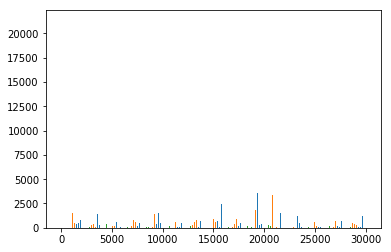

In [584]:
highvalcus[y=['loc_ic_MOU','loc_og_MOU','std_ic_MOU','std_og_MOU']].plot(kind ='bar')
plt.show()

In [443]:
#Hi,
#
#For LOgistic Regression >> LogisticRegression(class_weight='balanced')
#
#Random Forest >> RandomForestClassifier(class_weight={0:0.1, 1: 0.9})
#
# 
#
#Similarly, you can do  with other algo.

In [444]:
### class imbalance in the predictor variable churn
#techniques to handle class imbalance need to be used 
(highvalcus['churn'].value_counts()/len(highvalcus))*100

0    91.435625
1     8.564375
Name: churn, dtype: float64

In [445]:
##  impute all null values with zzero
highvalcus = highvalcus.fillna(0)
print(highvalcus.isnull().any().sum())

0


In [446]:
## check for dummy variable creation,no object type and category variablez
highvalcus.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29973 entries, 7 to 99997
Columns: 147 entries, arpu_6 to std_og_MOU
dtypes: float64(121), int32(1), int64(25)
memory usage: 33.7 MB


### Correlation Matrix

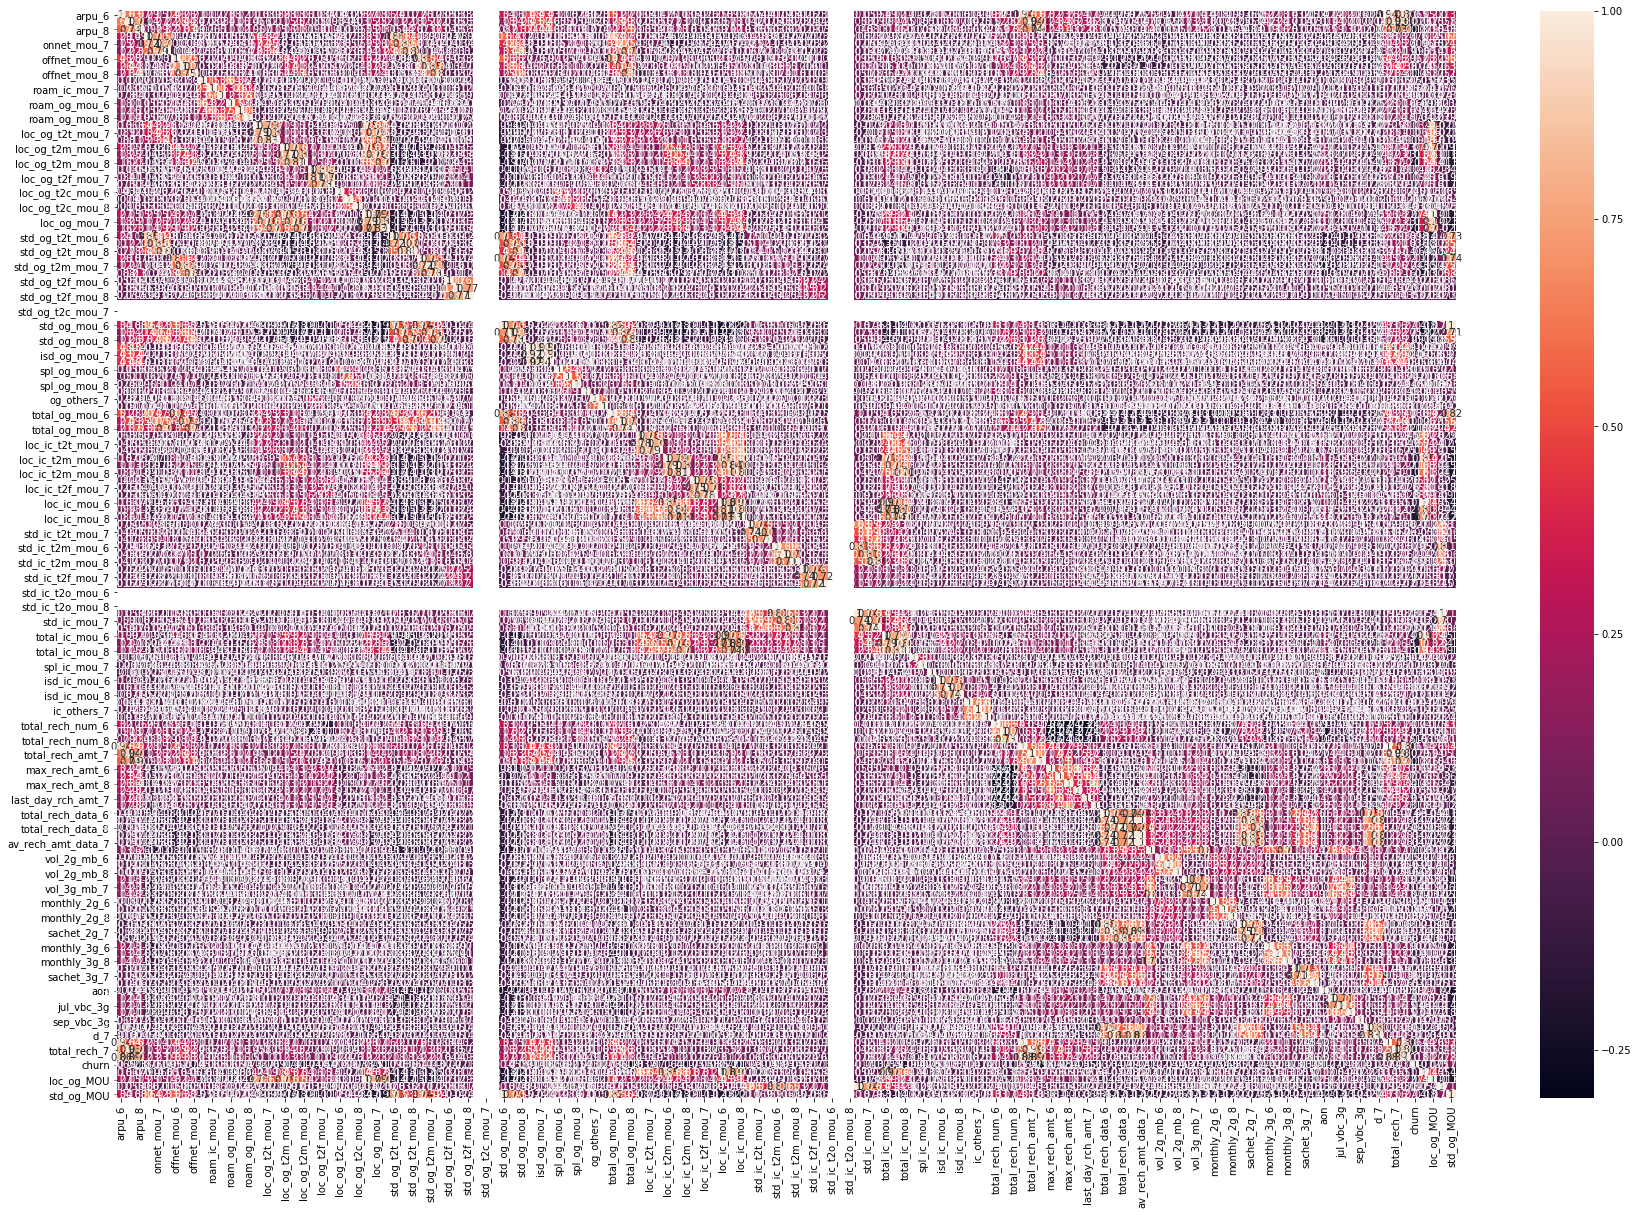

In [448]:
plt.figure(figsize = (30,20))
sns.heatmap(highvalcus.corr(),annot = True)

#### Correlation matrix
#### the above map suggests there is a huge chunk of variables which are highly correlated,let us put them in a df and reduce
#### multi colineraity

#### 1.all MOU columns
#### 2. all columns related to ammount/count and data usage columns


#### Removing multicollineraity using PCA and then RFE

In [449]:
highvalcus["churn"].head()

7     1
8     0
13    0
16    0
17    0
Name: churn, dtype: int32

In [450]:
#copying final dataframe into X variable
X=highvalcus

In [451]:
#creating final Xand y Variable
y = X['churn']

X=X.drop(columns="churn",axis=1)


### Feature Scaling

In [452]:
#scaling the column values
# scaling the features
from sklearn.preprocessing import scale

# storing column names in cols, since column names are (annoyingly) lost after 
# scaling (the df is converted to a numpy array)
cols = X.columns
X = pd.DataFrame(scale(X))
X.columns = cols
X.columns

Index(['arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7',
       'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8',
       'roam_ic_mou_6',
       ...
       'sep_vbc_3g', 'd_6', 'd_7', 'total_rech_6', 'total_rech_7', 'avg',
       'loc_ic_MOU', 'loc_og_MOU', 'std_ic_MOU', 'std_og_MOU'],
      dtype='object', length=146)

### Splitting Data into Test and Train

In [453]:
# split into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.7,
                                                    test_size = 0.3, random_state=100)

### Principal Component Analysis

In [454]:
#PCA OVER WHOLE DATA
from sklearn.decomposition import PCA
pca = PCA(n_components=80)
principalComponents = pca.fit_transform(X_train)
#principalDf = pd.DataFrame(data = principalComponents
             #, columns = ['principal component 1', 'principal component 2','principal component 3','principal component 4','principal component 5','principal component 6','principal component 7','principal component 8','principal component 9','principal component 10'])


In [455]:
#retriving the 2 component analysis
colnames = list(X.columns)
pca_df = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1], 'Feature':colnames})
pca_df.head()

PC1       PC2      Feature
0  0.117929  0.087369       arpu_6
1  0.122466  0.095057       arpu_7
2  0.129813  0.080508       arpu_8
3  0.040514  0.153538  onnet_mou_6
4  0.042592  0.165159  onnet_mou_7

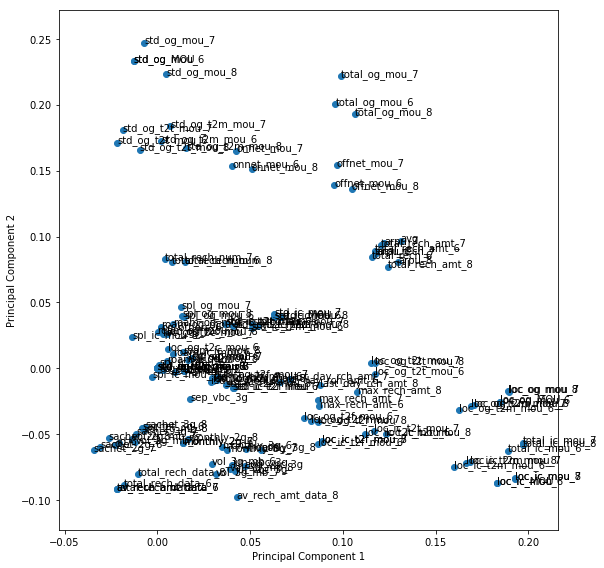

In [456]:
#visulaising the 2 component analysis
%matplotlib inline
fig = plt.figure(figsize = (40,20))
plt.scatter(pca_df.PC1, pca_df.PC2)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
for i, txt in enumerate(pca_df.Feature):
    plt.annotate(txt, (pca_df.PC1[i],pca_df.PC2[i]))
plt.tight_layout()
plt.show()

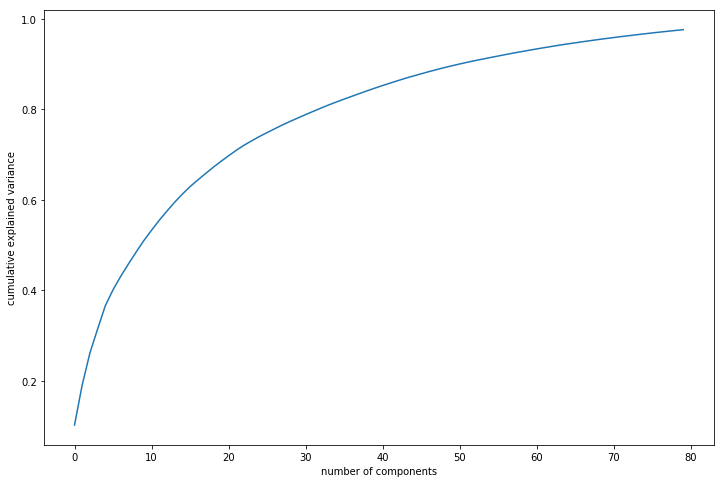

In [457]:
#Making the screeplot - plotting the cumulative variance against the number of components
%matplotlib inline
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

Around 65 features we are achieving Variance aprox 90%.

In [458]:
#over 80 feature component building the model
pca_train = pca.transform(X_train)
pca_test = pca.transform(X_test)
pca_train.shape

(20981, 80)

In [459]:
#building model using Logistic regression
from sklearn.linear_model import LogisticRegression
logreg1 = LogisticRegression(class_weight='balanced')
logreg1.fit(pca_train, y_train)

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [460]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = logreg1.predict(pca_test)
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
# Explained variance score: 1 is perfect prediction
print('R2 score: %.2f' % r2_score(y_test, y_pred))


Mean squared error: 0.18
R2 score: -1.43


### Metrics with PCA and Logistic Regression

In [461]:
# metrics
print(metrics.confusion_matrix(y_test, y_pred), "\n")
print("accuracy", metrics.accuracy_score(y_test, y_pred))
print("precision", metrics.precision_score(y_test, y_pred,average='micro'))
print("sensitivity/recall", metrics.recall_score(y_test, y_pred,average='micro'))

[[6698 1549]
 [ 111  634]] 

accuracy 0.8153914590747331
precision 0.8153914590747331
sensitivity/recall 0.8153914590747331


### Hyperparameter Tuning

In [462]:
#from screeplot tuning the parameter and building the model again
pca = PCA(n_components=65,random_state=100)
#Scale and transform data to get Principal Components

Xtrain_reduced = pca.fit_transform(X_train)
Xtest_reduced = pca.transform(X_test)

In [463]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(class_weight ='balanced')

In [464]:
logreg.fit(Xtrain_reduced, y_train)

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [465]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = logreg.predict(Xtest_reduced)
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
# Explained variance score: 1 is perfect prediction
print('R2 score: %.2f' % r2_score(y_test, y_pred))


Mean squared error: 0.18
R2 score: -1.41


In [466]:
from sklearn.metrics import explained_variance_score
explained_variance_score(y_test, y_pred) 

-1.086570263907233

In [592]:
y_explr = pd.Series(y_pred)

In [593]:
y_explr.value_counts()/len(y_explr)

0    0.759675
1    0.240325
dtype: float64

In [467]:
# metrics
print(metrics.confusion_matrix(y_test, y_pred), "\n")
print("accuracy", metrics.accuracy_score(y_test, y_pred))
print("precision", metrics.precision_score(y_test, y_pred,average='micro'))
print("sensitivity/recall", metrics.recall_score(y_test, y_pred,average='micro'))

[[6714 1533]
 [ 116  629]] 

accuracy 0.816614768683274
precision 0.816614768683274
sensitivity/recall 0.816614768683274


 ### Feature Selection Using RFE

In [468]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(class_weight = 'balanced')
from sklearn.feature_selection import RFE
rfe = RFE(logreg,30)             # running RFE with 30 variables as output
rfe = rfe.fit(X_train, y_train)

In [469]:
rfe.support_

array([ True,  True, False,  True, False,  True, False,  True, False,
       False, False, False, False, False, False, False, False,  True,
       False,  True, False, False, False, False, False, False, False,
       False, False, False,  True,  True,  True, False, False,  True,
       False, False, False, False, False, False, False,  True, False,
       False, False, False, False, False, False, False, False,  True,
       False, False,  True, False, False, False, False,  True,  True,
       False, False, False, False, False,  True, False,  True,  True,
       False, False,  True, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False,  True, False, False, False, False, False, False,  True,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False,

In [470]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('arpu_6', True, 1),
 ('arpu_7', True, 1),
 ('arpu_8', False, 13),
 ('onnet_mou_6', True, 1),
 ('onnet_mou_7', False, 17),
 ('onnet_mou_8', True, 1),
 ('offnet_mou_6', False, 4),
 ('offnet_mou_7', True, 1),
 ('offnet_mou_8', False, 19),
 ('roam_ic_mou_6', False, 32),
 ('roam_ic_mou_7', False, 74),
 ('roam_ic_mou_8', False, 79),
 ('roam_og_mou_6', False, 77),
 ('roam_og_mou_7', False, 23),
 ('roam_og_mou_8', False, 81),
 ('loc_og_t2t_mou_6', False, 49),
 ('loc_og_t2t_mou_7', False, 22),
 ('loc_og_t2t_mou_8', True, 1),
 ('loc_og_t2m_mou_6', False, 59),
 ('loc_og_t2m_mou_7', True, 1),
 ('loc_og_t2m_mou_8', False, 36),
 ('loc_og_t2f_mou_6', False, 39),
 ('loc_og_t2f_mou_7', False, 6),
 ('loc_og_t2f_mou_8', False, 68),
 ('loc_og_t2c_mou_6', False, 69),
 ('loc_og_t2c_mou_7', False, 48),
 ('loc_og_t2c_mou_8', False, 58),
 ('loc_og_mou_6', False, 108),
 ('loc_og_mou_7', False, 47),
 ('loc_og_mou_8', False, 46),
 ('std_og_t2t_mou_6', True, 1),
 ('std_og_t2t_mou_7', True, 1),
 ('std_og_t2t_mou_

In [471]:
col = X_train.columns[rfe.support_]

In [472]:
X_train.columns[~rfe.support_]

Index(['arpu_8', 'onnet_mou_7', 'offnet_mou_6', 'offnet_mou_8',
       'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8', 'roam_og_mou_6',
       'roam_og_mou_7', 'roam_og_mou_8',
       ...
       'jul_vbc_3g', 'jun_vbc_3g', 'd_6', 'd_7', 'total_rech_6', 'avg',
       'loc_ic_MOU', 'loc_og_MOU', 'std_ic_MOU', 'std_og_MOU'],
      dtype='object', length=116)

In [473]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = rfe.predict(X_test)
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
# Explained variance score: 1 is perfect prediction
print('R2 score: %.2f' % r2_score(y_test, y_pred))


Mean squared error: 0.18
R2 score: -1.42


### Metrics with Logistic regression using Recursive Feature Elimination

In [474]:
# metrics
print(metrics.confusion_matrix(y_test, y_pred), "\n")
print("accuracy", metrics.accuracy_score(y_test, y_pred))
print("precision", metrics.precision_score(y_test, y_pred,average='micro'))
print("sensitivity/recall", metrics.recall_score(y_test, y_pred,average='micro'))

[[6712 1535]
 [ 119  626]] 

accuracy 0.81605871886121
precision 0.81605871886121
sensitivity/recall 0.81605871886121


### From above two models we find both PCA with 65 features and RFE with 30 features giving same evaluation metrics

### Now we will try to build other models using Decision Tree an Random Forest and see which model performs best

In [475]:
from sklearn.tree import DecisionTreeClassifier
# Fitting the decision tree with default hyperparameters, apart from
# max_depth which is 5 so that we can plot and read the tree.
dt_default = DecisionTreeClassifier(max_depth=3)
dt_default.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [476]:
# Importing required packages for visualization
from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydotplus, graphviz

# Putting features
features = list(X.columns[0:])
features

ModuleNotFoundError: No module named 'graphviz'

In [ ]:
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/graphviz-2.38/release/bin/'

In [ ]:
# plotting tree with max_depth=3
dot_data = StringIO()  
export_graphviz(dt_default, out_file=dot_data,
                feature_names=features, filled=True,rounded=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_pdf("dt_telecomchurn.pdf")

In [ ]:
# the pdf with the tree will be written in this directory on your system
import os
os.getcwd()

In [ ]:
# Let's check the evaluation metrics of our default model

# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Making predictions
y_pred_default = dt_default.predict(X_test)

# Printing classification report
print(classification_report(y_test, y_pred_default))

In [ ]:
# Printing confusion matrix and accuracy
print(confusion_matrix(y_test,y_pred_default))
print(accuracy_score(y_test,y_pred_default))

In [ ]:
# plotting tree with max_depth=3
dot_data = StringIO()  
export_graphviz(dt_default, out_file=dot_data,
                feature_names=features, filled=True,rounded=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

### Hyperparameter Tuning for Decision Tree

In [ ]:
# GridSearchCV to find optimal max_depth
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_depth': range(1, 40)}

# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini", 
                               random_state = 100)

# fit tree on training data
tree = GridSearchCV(dtree, parameters, 
                    cv=n_folds, 
                   scoring="accuracy")
tree.fit(X_train, y_train)

In [ ]:
# scores of GridSearch CV
scores = tree.cv_results_
pd.DataFrame(scores).head()

#### Now let's visualize how train and test score changes with max_depth.

In [ ]:
# plotting accuracies with max_depth
plt.figure()
plt.plot(scores["param_max_depth"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

##### You can see that as we increase the value of max_depth, both training and test score increase till about max-depth = 5, after which the test score gradually reduces. Note that the scores are average accuracies across the 3-folds.
#### Thus, it is clear that the model is overfitting the training data if the max_depth is too high. Next, let's see how the model behaves with other hyperparameters.

In [ ]:
# GridSearchCV to find optimal min_samples_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_split': range(5, 200, 20)}

# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini", 
                               random_state = 100)

# fit tree on training data
tree = GridSearchCV(dtree, parameters, 
                    cv=n_folds, 
                   scoring="accuracy")
tree.fit(X_train, y_train)

In [ ]:
# scores of GridSearch CV
scores = tree.cv_results_
pd.DataFrame(scores).head()

In [ ]:
# plotting accuracies with min_samples_leaf
plt.figure()
plt.plot(scores["param_min_samples_split"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_split"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_split")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


###### This shows that as you increase the min_samples_split, the tree overfits lesser since the model is less complex.

### Grid Search to Find Optimal Hyperparameters

In [ ]:
# Create the parameter grid 
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
    'criterion': ["entropy", "gini"]
}

n_folds = 5

# Instantiate the grid search model
dtree = DecisionTreeClassifier()
grid_search = GridSearchCV(estimator = dtree, param_grid = param_grid, 
                          cv = n_folds, verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_train,y_train)

In [ ]:
# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results

In [ ]:
# printing the optimal accuracy score and hyperparameters
print("best accuracy", grid_search.best_score_)
print(grid_search.best_estimator_)

#### Running the model with best parameters obtained from grid search.

In [ ]:
# model with optimal hyperparameters
clf_gini = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=5, 
                                  min_samples_leaf=50,
                                  min_samples_split=50)
clf_gini.fit(X_train, y_train)

In [ ]:
# accuracy score
clf_gini.score(X_test,y_test)

In [ ]:
# plotting the tree
dot_data = StringIO()  
export_graphviz(clf_gini, out_file=dot_data,feature_names=features,filled=True,rounded=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

#### This tree is too complex to understand. Let's try reducing the max_depth and see how the tree looks.

In [ ]:
# tree with max_depth = 3
clf_gini = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=3, 
                                  min_samples_leaf=50,
                                  min_samples_split=50)
clf_gini.fit(X_train, y_train)

# score
print(clf_gini.score(X_test,y_test))

In [ ]:
# plotting tree with max_depth=3
dot_data = StringIO()  
export_graphviz(clf_gini, out_file=dot_data,feature_names=features,filled=True,rounded=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [ ]:
# classification metrics from Decision Tree
from sklearn.metrics import classification_report,confusion_matrix
y_pred = clf_gini.predict(X_test)
print(classification_report(y_test, y_pred))

In [ ]:
# confusion matrix from Decision Tree
print(confusion_matrix(y_test,y_pred))

### Random Forest Model

In [477]:
# Importing random forest classifier from sklearn library
from sklearn.ensemble import RandomForestClassifier

# Running the random forest with default parameters.
rfc = RandomForestClassifier(class_weight={0:0.1, 1: 0.9})

In [478]:
# fit
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight={0: 0.1, 1: 0.9},
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [479]:
# Making predictions
predictions = rfc.predict(X_test)

In [480]:
# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score

In [481]:
# Let's check the report of our default model
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.95      0.99      0.97      8247
          1       0.75      0.41      0.53       745

avg / total       0.93      0.94      0.93      8992



In [482]:
# Printing confusion matrix
print(confusion_matrix(y_test,predictions
                      ))

[[8145  102]
 [ 441  304]]


In [483]:
print(accuracy_score(y_test,predictions))

0.9396129893238434


##### Hyperparameter Tuning

In [484]:
# GridSearchCV to find optimal n_estimators
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_depth': range(2, 20, 5)}

# instantiate the model
rf = RandomForestClassifier(class_weight={0:0.1, 1: 0.9})


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy")
rf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight={0: 0.1, 1: 0.9},
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': range(2, 20, 5)}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring='accuracy',
       verbose=0)

In [485]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.610422      0.031245         0.016703        0.001436   
1       1.882676      0.214063         0.028906        0.006046   
2       2.936087      0.499131         0.038608        0.006562   
3       3.227946      0.519178         0.058012        0.036417   

  param_max_depth             params  split0_test_score  split1_test_score  \
0               2   {'max_depth': 2}           0.905647           0.912080   
1               7   {'max_depth': 7}           0.918513           0.925185   
2              12  {'max_depth': 12}           0.934477           0.936383   
3              17  {'max_depth': 17}           0.936860           0.939004   

   split2_test_score  split3_test_score       ...         mean_test_score  \
0           0.902050           0.887989       ...                0.902483   
1           0.921115           0.914919       ...                0.921310   
2           0.935891           0.931125       ...                0.935084   
3           0.939943           0.935653       ...                0.939183   

   std_test_score  rank_test_score  split0_train_score  split1_train_score  \
0        0.007964                4            0.908008            0.904016   
1        0.004337                3            0.938870            0.940658   
2        0.002211                2            0.969733            0.968780   
3        0.003042                1            0.980875            0.980875   

   split2_train_score  split3_train_score  split4_train_score  \
0            0.897349            0.900864            0.900095   
1            0.935001            0.935240            0.934171   
2            0.971343            0.972535            0.968605   
3            0.979863            0.982127            0.980996   

   mean_train_score  std_train_score  
0          0.902066         0.003652  
1          0.936788         0.002520  
2          0.970199         0.001519  
3          0.980947         0.000718  

[4 rows x 21 columns]

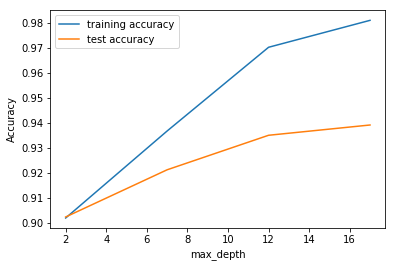

In [486]:
# plotting accuracies with max_depth
plt.figure()
plt.plot(scores["param_max_depth"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


##### You can see that as we increase the value of max_depth, both train and test scores increase till a point, but after that test score starts to decrease. The ensemble tries to overfit as we increase the max_depth.

Thus, controlling the depth of the constituent trees will help reduce overfitting in the forest.

#### Tuning n_estimators

In [487]:
# GridSearchCV to find optimal n_estimators
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'n_estimators': range(100, 1500, 400)}

# instantiate the model (note we are specifying a max_depth)
rf = RandomForestClassifier(max_depth=7,class_weight={0:0.1, 1: 0.9})


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy")
rf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight={0: 0.1, 1: 0.9},
            criterion='gini', max_depth=7, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': range(100, 1500, 400)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [488]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0      14.651130      1.254374         0.136327        0.008111   
1      65.625523      0.655007         0.617823        0.046678   
2     117.284752      1.213775         1.128926        0.141619   
3     171.943117      3.180726         1.582095        0.119643   

  param_n_estimators                  params  split0_test_score  \
0                100   {'n_estimators': 100}           0.925661   
1                500   {'n_estimators': 500}           0.924946   
2                900   {'n_estimators': 900}           0.927091   
3               1300  {'n_estimators': 1300}           0.926376   

   split1_test_score  split2_test_score  split3_test_score       ...         \
0           0.928520           0.930172           0.921592       ...          
1           0.929473           0.932316           0.922307       ...          
2           0.928044           0.931840           0.922307       ...          
3           0.928520           0.931363           0.922307       ...          

   mean_test_score  std_test_score  rank_test_score  split0_train_score  \
0         0.926648        0.002928                4            0.942803   
1         0.927887        0.003693                1            0.943041   
2         0.927887        0.003242                1            0.943458   
3         0.927839        0.003269                3            0.942981   

   split1_train_score  split2_train_score  split3_train_score  \
0            0.942266            0.939648            0.941615   
1            0.943637            0.942806            0.942270   
2            0.943458            0.942389            0.941912   
3            0.943101            0.942508            0.942449   

   split4_train_score  mean_train_score  std_train_score  
0            0.940486          0.941364         0.001154  
1            0.941082          0.942567         0.000863  
2            0.941320          0.942508         0.000847  
3            0.941618          0.942531         0.000523  

[4 rows x 21 columns]

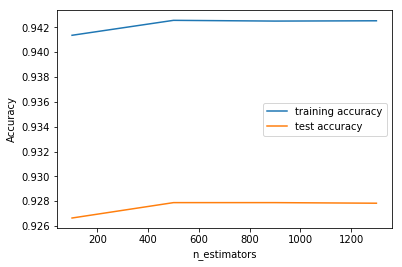

In [489]:
# plotting accuracies with n_estimators
plt.figure()
plt.plot(scores["param_n_estimators"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_n_estimators"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("n_estimators")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


#### Tuning max_features

In [490]:
# GridSearchCV to find optimal max_features
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_features': [4, 8, 14, 20, 24]}

# instantiate the model
rf = RandomForestClassifier(max_depth=7,class_weight={0:0.1, 1: 0.9})


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy")
rf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight={0: 0.1, 1: 0.9},
            criterion='gini', max_depth=7, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_features': [4, 8, 14, 20, 24]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [491]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.610978      0.031150         0.026295        0.007618   
1       0.995501      0.042201         0.021296        0.001122   
2       1.702159      0.089387         0.020996        0.001870   
3       2.299740      0.055260         0.020896        0.001685   
4       2.814137      0.164890         0.020296        0.001288   

  param_max_features                params  split0_test_score  \
0                  4   {'max_features': 4}           0.919705   
1                  8   {'max_features': 8}           0.918513   
2                 14  {'max_features': 14}           0.919466   
3                 20  {'max_features': 20}           0.922087   
4                 24  {'max_features': 24}           0.918751   

   split1_test_score  split2_test_score  split3_test_score       ...         \
0           0.923517           0.922069           0.914919       ...          
1           0.925423           0.924452           0.913727       ...          
2           0.925423           0.928265           0.916349       ...          
3           0.918751           0.922545           0.917779       ...          
4           0.925185           0.925882           0.919447       ...          

   mean_test_score  std_test_score  rank_test_score  split0_train_score  \
0         0.920690        0.003184                5            0.930946   
1         0.921071        0.004372                4            0.934938   
2         0.922358        0.004213                2            0.936547   
3         0.921357        0.002820                3            0.941194   
4         0.922740        0.003016                1            0.940360   

   split1_train_score  split2_train_score  split3_train_score  \
0            0.932019            0.930712            0.931189   
1            0.936428            0.932976            0.933929   
2            0.938692            0.937325            0.938636   
3            0.938215            0.939768            0.942032   
4            0.941373            0.938695            0.938755   

   split4_train_score  mean_train_score  std_train_score  
0            0.927797          0.930532         0.001437  
1            0.932205          0.934095         0.001483  
2            0.936495          0.937539         0.000965  
3            0.934469          0.939135         0.002670  
4            0.936256          0.939088         0.001739  

[5 rows x 21 columns]

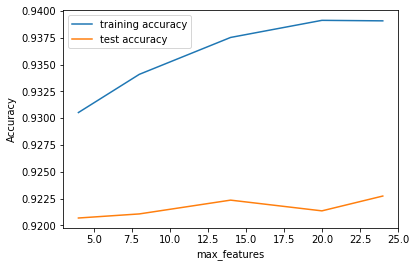

In [492]:
# plotting accuracies with max_features
plt.figure()
plt.plot(scores["param_max_features"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_features"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_features")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

#### Tuning min_samples_leaf

In [493]:
# GridSearchCV to find optimal min_samples_leaf
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_leaf': range(100, 400, 50)}

# instantiate the model
rf = RandomForestClassifier(class_weight={0:0.1, 1: 0.9})


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy")
rf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight={0: 0.1, 1: 0.9},
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'min_samples_leaf': range(100, 400, 50)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [494]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       1.581684      0.062981         0.021596        0.000374   
1       1.406419      0.038495         0.022396        0.002130   
2       1.309038      0.025990         0.019596        0.000374   
3       1.201260      0.022490         0.018996        0.000837   
4       1.269346      0.116851         0.020996        0.003331   

  param_min_samples_leaf                     params  split0_test_score  \
0                    100  {'min_samples_leaf': 100}           0.900405   
1                    150  {'min_samples_leaf': 150}           0.894210   
2                    200  {'min_samples_leaf': 200}           0.893257   
3                    250  {'min_samples_leaf': 250}           0.886109   
4                    300  {'min_samples_leaf': 300}           0.891113   

   split1_test_score  split2_test_score  split3_test_score       ...         \
0           0.906600           0.903003           0.893470       ...          
1           0.903503           0.906339           0.890133       ...          
2           0.905409           0.892278           0.882507       ...          
3           0.901358           0.890848           0.876787       ...          
4           0.883250           0.894185           0.882507       ...          

   mean_test_score  std_test_score  rank_test_score  split0_train_score  \
0         0.901149        0.004334                1            0.904552   
1         0.900386        0.006965                2            0.898475   
2         0.894714        0.007754                3            0.900322   
3         0.890949        0.009032                4            0.895436   
4         0.889900        0.006194                5            0.896806   

   split1_train_score  split2_train_score  split3_train_score  \
0            0.912000            0.905749            0.908728   
1            0.901275            0.906166            0.902472   
2            0.903122            0.891749            0.898779   
3            0.901573            0.892106            0.892583   
4            0.884890            0.894608            0.893000   

   split4_train_score  mean_train_score  std_train_score  
0            0.908436          0.907893         0.002593  
1            0.903193          0.902316         0.002508  
2            0.896878          0.898170         0.003806  
3            0.895746          0.895489         0.003376  
4            0.895627          0.892986         0.004237  

[5 rows x 21 columns]

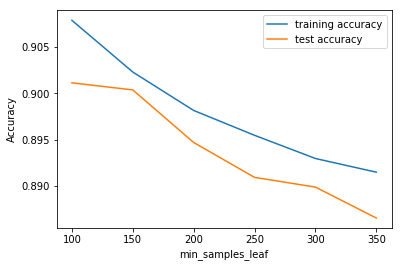

In [495]:
# plotting accuracies with min_samples_leaf
plt.figure()
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_leaf")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

#####Tuning min_samples_split

In [496]:
# GridSearchCV to find optimal min_samples_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_split': range(50, 500, 50)}

# instantiate the model
rf = RandomForestClassifier(class_weight={0:0.1, 1: 0.9})


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy")
rf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight={0: 0.1, 1: 0.9},
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'min_samples_split': range(50, 500, 50)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [497]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       2.346731      0.112600         0.033893        0.006966   
1       2.320136      0.142779         0.029394        0.002010   
2       2.043591      0.135859         0.025895        0.000800   
3       2.042570      0.044011         0.024596        0.000374   
4       1.976400      0.031899         0.025600        0.001985   

  param_min_samples_split                      params  split0_test_score  \
0                      50   {'min_samples_split': 50}           0.928044   
1                     100  {'min_samples_split': 100}           0.914939   
2                     150  {'min_samples_split': 150}           0.909459   
3                     200  {'min_samples_split': 200}           0.902788   
4                     250  {'min_samples_split': 250}           0.898499   

   split1_test_score  split2_test_score  split3_test_score       ...         \
0           0.931856           0.928980           0.923737       ...          
1           0.922564           0.925882           0.912297       ...          
2           0.915892           0.915396           0.903718       ...          
3           0.912318           0.912536           0.896330       ...          
4           0.910174           0.913251           0.890848       ...          

   mean_test_score  std_test_score  rank_test_score  split0_train_score  \
0         0.929031        0.003140                1            0.959426   
1         0.918927        0.004928                2            0.937917   
2         0.911634        0.004560                3            0.929933   
3         0.907631        0.006930                4            0.916289   
4         0.903961        0.008199                5            0.913191   

   split1_train_score  split2_train_score  split3_train_score  \
0            0.959664            0.954960            0.959786   
1            0.939287            0.940483            0.937504   
2            0.926537            0.924278            0.925350   
3            0.925167            0.918380            0.917665   
4            0.918792            0.914030            0.908132   

   split4_train_score  mean_train_score  std_train_score  
0            0.957107          0.958188         0.001890  
1            0.936256          0.938289         0.001463  
2            0.921601          0.925540         0.002736  
3            0.921482          0.919796         0.003179  
4            0.908614          0.912552         0.003913  

[5 rows x 21 columns]

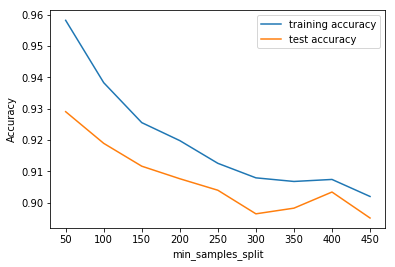

In [498]:
# plotting accuracies with min_samples_split
plt.figure()
plt.plot(scores["param_min_samples_split"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_split"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_split")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

#### Grid Search to Find Optimal Hyperparameters

In [499]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [4,8,10],
    'min_samples_leaf': range(100, 400, 200),
    'min_samples_split': range(200, 500, 200),
    'n_estimators': [100,200, 300], 
    'max_features': [5, 10]
}
# Create a based model
rf = RandomForestClassifier(class_weight={0:0.1, 1: 0.9})
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1,verbose = 1)

In [500]:
# Fit the grid search to the data
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 72 candidates, totalling 216 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  5.2min
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed: 83.3min
[Parallel(n_jobs=-1)]: Done 216 out of 216 | elapsed: 87.9min finished


GridSearchCV(cv=3, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight={0: 0.1, 1: 0.9},
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'max_depth': [4, 8, 10], 'min_samples_leaf': range(100, 400, 200), 'min_samples_split': range(200, 500, 200), 'n_estimators': [100, 200, 300], 'max_features': [5, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

In [501]:
# printing the optimal accuracy score and hyperparameters
print('We can get accuracy of',grid_search.best_score_,'using',grid_search.best_params_)

We can get accuracy of 0.910347457223202 using {'max_depth': 4, 'max_features': 10, 'min_samples_leaf': 100, 'min_samples_split': 200, 'n_estimators': 300}


#### Fitting the final model with the best parameters obtained from grid search.

In [502]:
# model with the best hyperparameters
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(bootstrap=True,
                             max_depth=10,
                             min_samples_leaf=100, 
                             min_samples_split=200,
                             max_features=10,
                             n_estimators=100,class_weight={0:0.1, 1: 0.9})

In [503]:
# fit
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight={0: 0.1, 1: 0.9},
            criterion='gini', max_depth=10, max_features=10,
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=100,
            min_samples_split=200, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [504]:
# predict
predictions = rfc.predict(X_test)

In [505]:
# evaluation metrics
from sklearn.metrics import classification_report,confusion_matrix

In [506]:
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.98      0.92      0.95      8247
          1       0.46      0.75      0.57       745

avg / total       0.93      0.91      0.92      8992



In [507]:
print(confusion_matrix(y_test,predictions))

[[7599  648]
 [ 184  561]]


In [508]:
## extract single tree
estimator = rfc.estimators_[10]

In [509]:
from sklearn.tree import export_graphviz

In [512]:
export_graphviz(estimator, out_file='tree.dot', 
                
                rounded = True, proportion = False, 
                precision = 2, filled = True)

In [515]:
# Convert to png using system command (requires Graphviz)
from subprocess import call


In [516]:
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

FileNotFoundError: [WinError 2] The system cannot find the file specified

In [514]:
# Display in jupyter notebook
from IPython.display import Image
Image(filename = 'tree.png')

FileNotFoundError: [Errno 2] No such file or directory: 'tree.png'